In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
import random

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def draw_board(ships):
    fig, ax = plt.subplots()
    colors = cycle(['red', 'green', 'blue'])
    for name, coord in ships.items():
        x, y = zip(*coord)
        ax.scatter(x, y, color=colors.next(), label=name)
    ax.grid()
    ax.set_aspect('equal')
    ax.set_xlim([-1, 10])
    ax.set_ylim([-1, 10])
    #ax.legend()
    plt.show()

def draw_history(shots, hits, ships=None):
    fig, ax = plt.subplots()
    if shots:
        ax.scatter(*zip(*shots), color='yellow')
    if hits:
        ax.scatter(*zip(*hits), color='black')
    if ships is not None:
        colors = cycle(['red', 'green', 'blue'])
        for name, coord in ships.items():
            x, y = zip(*coord)
            ax.scatter(x, y, color=colors.next(), label=name)
        
        
    ax.grid()
    ax.set_xlim([-1, 10])
    ax.set_ylim([-1, 10])
    ax.set_aspect('equal')
    plt.show()

In [3]:
def attack(attack_xy):
    '''
    ships invariant:
        (1) `ships`: only contains `ship` key if the ship has not been sunk.
        (2) ships[ship] contains coordinates which have not been hit.
        
    when ships is empty the game is over.
    
    '''
    # check if the attack hits any ships' coord
    for ship, coord in ships.items():
        if attack_xy in coord:
            status = 'Hit'
            # check if this hit the last part of the ship
            if len(coord) == 1:
                status = 'Sink'
            # maintain invariant (2)
            ships[ship].remove(attack_xy)
            break
    else:
        # no break, ie, no coord contained attack_xy
        status = 'Miss'
    
    # maintain invariant (1)
    for ship, coord in ships.items():
        if not coord:
            sunk_ship = ships.pop(ship)
            assert(sunk_ship == [])
            
    # if ships is empty, all ships were sunk, gg
    if not ships:
        status = 'Winner'
        
    return status

In [4]:
import copy

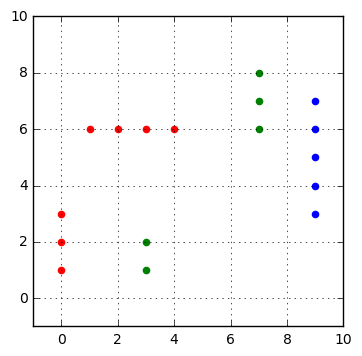

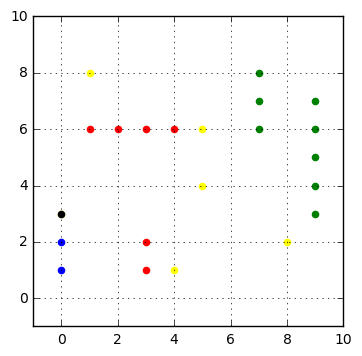

((0, 3), 'Hit')


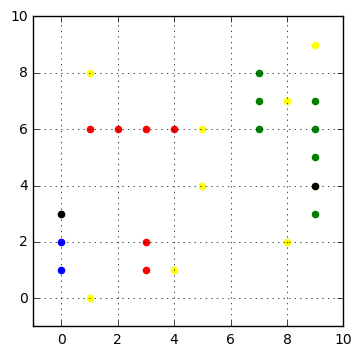

((9, 4), 'Hit')


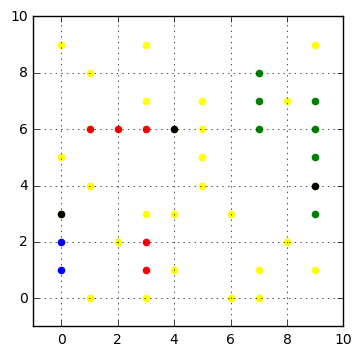

((4, 6), 'Hit')


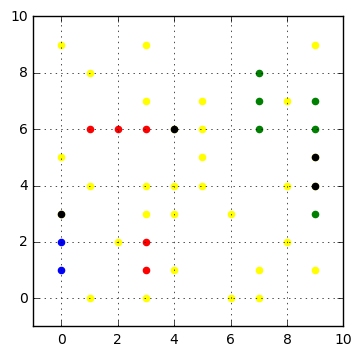

((9, 5), 'Hit')


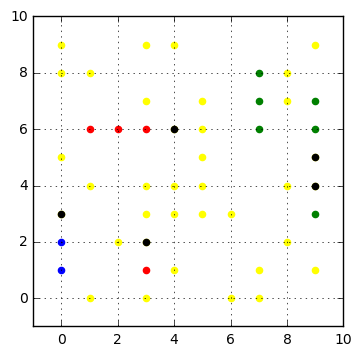

((3, 2), 'Hit')


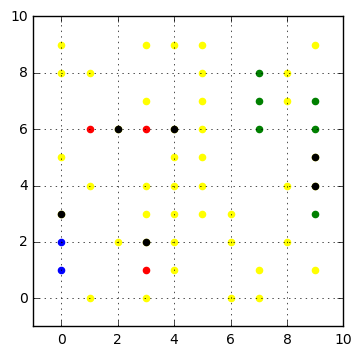

((2, 6), 'Hit')


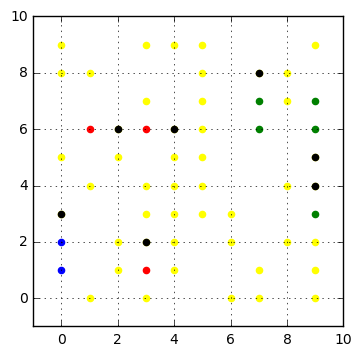

((7, 8), 'Hit')


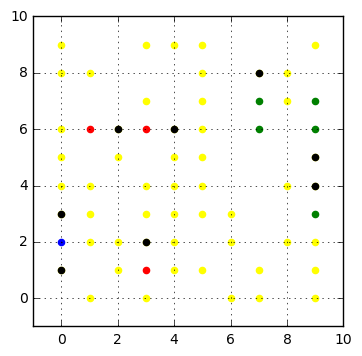

((0, 1), 'Hit')


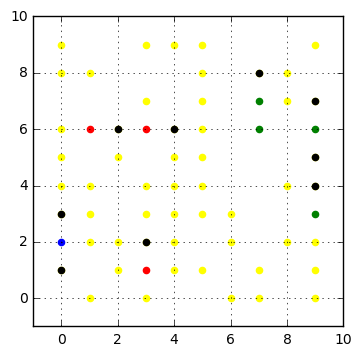

((9, 7), 'Hit')


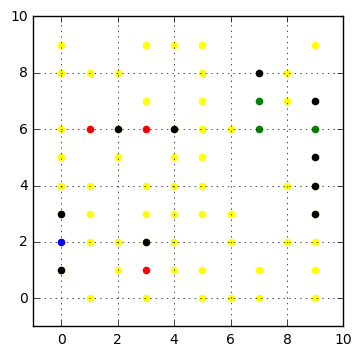

((9, 3), 'Hit')


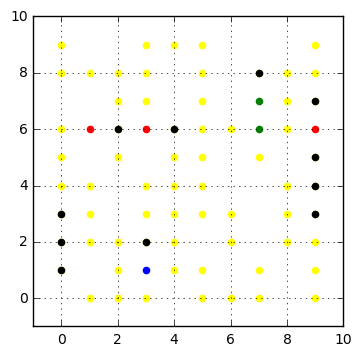

((0, 2), 'Sink')


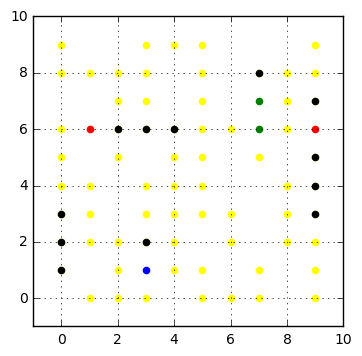

((3, 6), 'Hit')


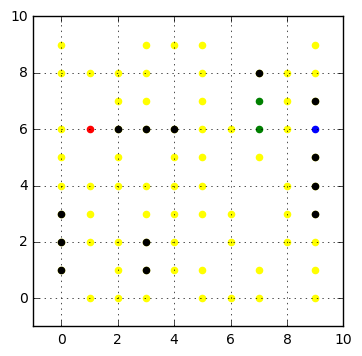

((3, 1), 'Sink')


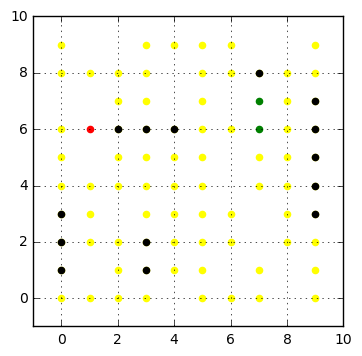

((9, 6), 'Sink')


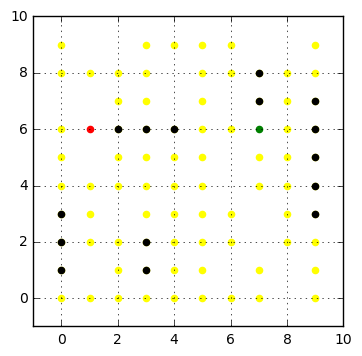

((7, 7), 'Hit')


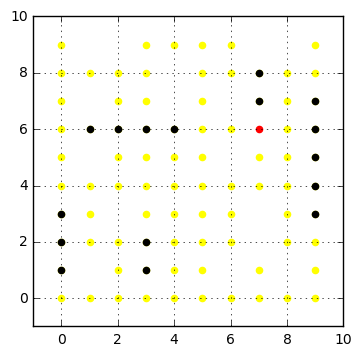

((1, 6), 'Sink')


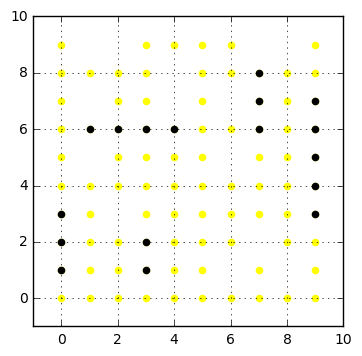

((7, 6), 'Winner')


In [5]:
ships = {
    'sub': [(0, 1), (0, 2), (0, 3)],
    'boat': [(3, 1), (3, 2)],
    'battle': [(1, 6), (2, 6), (3, 6), (4, 6)],
    'destroyer': [(7, 6), (7, 7), (7, 8)],
    'carrier': [(9,3), (9,4), (9,5), (9,6), (9,7)]
}
ships_freeze = copy.deepcopy(ships)
draw_board(ships_freeze)
plt.show()
status = None
coords = []
hits = []
shots = []
for i in range(10):
    for j in range(10):
        h = (i, j)
        coords.append(h)

while status != 'Winner':
    h = random.choice(coords)
    coords.remove(h)
    shots.append(h)
    status = attack(h)
    if status != 'Miss':
        hits.append(h)
        draw_history(shots, hits, ships=ships)
        print(h, status)

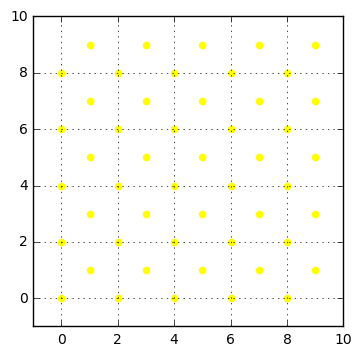

In [122]:
hits = []
shots = []
for i in range(10):
    for j in range(10):
        if (i + j) % 2 == 0:
            shots.append((i,j))
draw_history(shots, hits)